# HM1: Logistic Regression.

### Name: [Krystal Hong]


#### For this assignment, you will build 6 models. You need to train Logistic Regression/Regularized Logistic Regression each with Batch Gradient Descent, Stochastic Gradient Descent and Mini Batch Gradient Descent. Also, you should plot their objective values versus epochs and compare their training and testing accuracy. You will need to tune the parameters a little bit to obtain reasonable results.

#### You do not have to follow the following procedure. You may implement your own functions and methods, but you need to show your results and plots.

# 1. Data processing

- Download the Breast Cancer dataset from canvas or from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
- Load the data.
- Preprocess the data.

In [1]:
# Load Packages

import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import math
import numpy


## 1.1. Load the data

In [2]:
data = pd.read_csv('data.csv')
data


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## 1.2 Examine and clean data

In [3]:
# Some columns may not be useful for the model (For example, the first column contains ID number which may be irrelavant). 
# You need to get rid of the ID number feature.
# Also you should transform target labels in the second column from 'B' and 'M' to 1 and -1.

data.drop(data.columns[[0, 32]], axis = 1, inplace = True)

data['diagnosis'] = data['diagnosis'].replace('M',-1)
data['diagnosis'] = data['diagnosis'].replace('B',1)
data



,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,-1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,-1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,-1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,-1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,-1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,-1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,-1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 1.3. Partition to training and testing sets

In [4]:
# You can partition using 80% training data and 20% testing data. It is a commonly used ratio in machine learning.
x_train, x_test, y_train, y_test = train_test_split(numpy.asarray(data.iloc[:,1:]),numpy.asarray(data.iloc[:,0:1]) , test_size=0.2 )



## 1.4. Feature scaling

Use the standardization to transform both training and test features

In [5]:
# Standardization
import numpy

# calculate mu and sig using the training set
d = x_train.shape[1]
mu = numpy.mean(x_train, axis=0).reshape(1, d)
sig = numpy.std(x_train, axis=0).reshape(1, d)

# transform the training features
x_train = (x_train - mu) / (sig + 1E-6)

# transform the test features
x_test = (x_test - mu) / (sig + 1E-6)

print('test mean = ')
print(numpy.mean(x_test, axis=0))

print('test std = ')
print(numpy.std(x_test, axis=0))

test mean = 
[ 0.01522462 -0.04320674  0.0122374   0.02724467  0.12605583 -0.00761951
  0.04955413  0.02204137  0.14016791 -0.00996046  0.12327013 -0.02739211
  0.09109019  0.10317236  0.06455435 -0.08916862  0.02703936  0.00100458
  0.07252208 -0.09788439  0.04573566 -0.02416656  0.03121962  0.05216788
  0.1015744  -0.0556209   0.02634496 -0.00948556  0.11644837 -0.05361091]
test std = 
[1.04738769 0.94726711 1.04796768 1.07977505 0.95547587 0.99172858
 1.06088433 0.9949203  0.87460802 1.19506705 1.14465488 0.86459355
 1.12884481 1.34875081 1.09099223 0.88709454 1.16841651 0.94872398
 1.07484168 0.797966   1.02973966 1.00897264 1.04346793 1.07763414
 1.0161527  0.93098188 1.06439122 0.94773021 1.06844785 1.06275999]


# 2.  Logistic Regression Model

The objective function is $Q (w; X, y) = \frac{1}{n} \sum_{i=1}^n \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

When $\lambda = 0$, the model is a regular logistic regression and when $\lambda > 0$, it essentially becomes a regularized logistic regression.

In [6]:
# Calculate the objective function value, or loss
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     objective function value, or loss (scalar)
def objective(w, x, y, lam):
    sum = 0 #summation
    i = 0
    n=x.shape[0]
    while ( i < n): # from i to n
        sum += numpy.log(1 + numpy.exp(-y[i] *numpy.dot( x[i].T, w) ))
        i+=1
    sum /= n
    sum +=(lam/2)* (numpy.linalg.norm(w)**2) 
    
    return sum


# 3. Numerical optimization

## 3.1. Gradient descent


The gradient at $w$ for regularized logistic regression is  $g = - \frac{1}{n} \sum_{i=1}^n \frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$

In [7]:
# Calculate the gradient
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     g: gradient: d-by-1 matrix

def gradient(w, x, y, lam):
    sum = 0
    i = 0
    n = x.shape[0]
    
    
    while i < n:
        
        sum += (y[i]* x[i])/(1 + numpy.exp(y[i] *numpy.dot( x[i].T, w) ))
        i += 1

    return ((sum / -n) + (lam*w).T).T


In [8]:
# Gradient descent for solving logistic regression
# You will need to do iterative processes (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value

def gradient_descent(x, y, lam, learning_rate, w, max_epoch=100):
    objvals = []
    
    for epoch in range(max_epoch):
        obj, grad = objective(w,x,y,lam) , gradient(w, x, y, lam)
        w -= learning_rate * grad
        objvals.append(obj)
        
    return w, objvals


Use gradient_descent function to obtain your optimal weights and a list of objective values over each epoch.

In [9]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.

weights = numpy.zeros((x_train.shape[1], 1))
#learning rate and lambda
lr = 0.01
Lambda = 0.01

gd_w, gd_objvals = gradient_descent(x_train, y_train, 0, lr, weights)

In [10]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.

weights = numpy.zeros((x_train.shape[1], 1))


rgd_w, rgd_objvals = gradient_descent(x_train, y_train, Lambda, lr, weights)

## 3.2. Stochastic gradient descent (SGD)

Define new objective function $Q_i (w) = \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $. 

The stochastic gradient at $w$ is $g_i = \frac{\partial Q_i }{ \partial w} = -\frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [11]:
# Calculate the objective Q_i and the gradient of Q_i
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: 1-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def stochastic_objective_gradient(w, xi, yi, lam):
    grad = -(yi*xi).T/(1 + numpy.exp(yi *numpy.dot( xi, w) ))+ lam*w
    obj = numpy.log(1 + numpy.exp(-yi *numpy.dot( xi, w)  ))
    obj +=(lam/2)* (numpy.linalg.norm(w)**2) 
    return obj, grad



Hints:
1. In every epoch, randomly permute the $n$ samples.
2. Each epoch has $n$ iterations. In every iteration, use 1 sample, and compute the gradient and objective using the ``stochastic_objective_gradient`` function. In the next iteration, use the next sample, and so on.

In [12]:
# SGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def sgd(x, y, lam, learning_rate, w, max_epoch=100):
  n = x.shape[0]
  objvals = numpy.zeros(max_epoch)

  for i in range(max_epoch): #every epoch randomly permute n samples
    randi = numpy.random.permutation(n)
    x = x[randi]
    y = y[randi]

    i_oj = 0
    for j in range(n):
      xi, yi = x[j].reshape(1,d), y[j] #use 1 sample
      currObj, g = stochastic_objective_gradient(w, xi, yi, lam)

      w -= (learning_rate * g)
      i_oj += currObj
    
    objvals[i] = i_oj

  return w, objvals





Use sgd function to obtain your optimal weights and a list of objective values over each epoch.

In [13]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
weights = numpy.zeros((x_train.shape[1], 1))
sgd_w, sgd_objvals = sgd(x_train, y_train, 0, lr, weights)


In [14]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
weights = numpy.zeros((x_train.shape[1], 1))
rsgd_w, rsgd_objvals = sgd(x_train, y_train, Lambda, lr, weights)


## 3.3 Mini-Batch Gradient Descent (MBGD)

Define $Q_I (w) = \frac{1}{b} \sum_{i \in I} \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $, where $I$ is a set containing $b$ indices randomly drawn from $\{ 1, \cdots , n \}$ without replacement.

The stochastic gradient at $w$ is $g_I = \frac{\partial Q_I }{ \partial w} = \frac{1}{b} \sum_{i \in I} \frac{- y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [15]:
# Calculate the objective Q_I and the gradient of Q_I
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: b-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def mb_objective_gradient(w, xi, yi, lam):
    b = xi.shape[0]
    d = xi.shape[1]
    
    grad = 0
    for i in range(b):
        grad += numpy.divide(-yi[i]*xi[i], 1 + numpy.exp(yi[i] *numpy.dot( xi[i], w) )).reshape(d,1)

    grad /= b

    grad += lam*w
    
    obj=0
    
    for j in range(b):
        obj += numpy.log(1 + numpy.exp(-yi[j] *numpy.dot( xi[j], w)  ))
    obj /= b
    obj +=(lam/2)* (numpy.linalg.norm(w)**2) 
    return obj, grad



Hints:
1. In every epoch, randomly permute the $n$ samples (just like SGD).
2. Each epoch has $\frac{n}{b}$ iterations. In every iteration, use $b$ samples, and compute the gradient and objective using the ``mb_objective_gradient`` function. In the next iteration, use the next $b$ samples, and so on.

In [16]:
# MBGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def mbgd(x, y, lam, learning_rate, w, max_epoch=100):
    n = x.shape[0]
    batch = 20
    objvals = numpy.zeros(max_epoch)
    num_batches = n//batch #n/b iterations

    

    for i in range(max_epoch):
        randi = numpy.random.permutation(n) #randomly permute samples
        x_i = x[randi]
        y_i = y[randi]

        i_oj = 0
    
        for j in range(num_batches): #each epoch has batch size iterations
            s = j * batch
            e = s + batch          
            x_j = x_i[s:e]
            y_j = y_i[s:e]
            currObj, g = mb_objective_gradient(w, x_j, y_j, lam)

            w -= (learning_rate * g )
            i_oj += currObj
        objvals[i] = i_oj

    return w, objvals


Use mbgd function to obtain your optimal weights and a list of objective values over each epoch.

In [17]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
weights = numpy.zeros((x_train.shape[1], 1))
mbgd_w, mbgd_objvals = mbgd(x_train, y_train, 0, lr, weights)

In [18]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
weights = numpy.zeros((x_train.shape[1], 1))
rmbgd_w, rmbgd_objvals = mbgd(x_train, y_train, Lambda, lr, weights)


# 4. Compare GD, SGD, MBGD

### Plot objective function values against epochs.

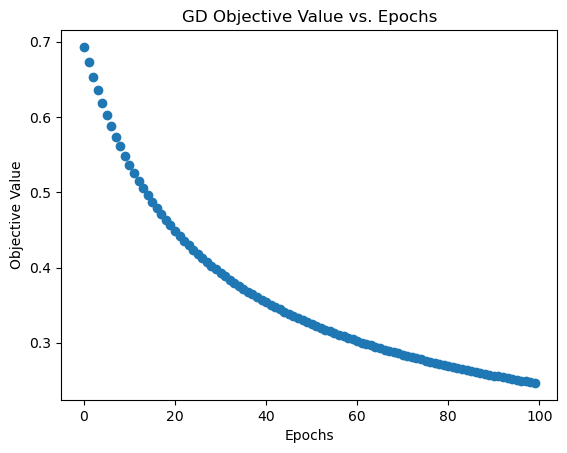

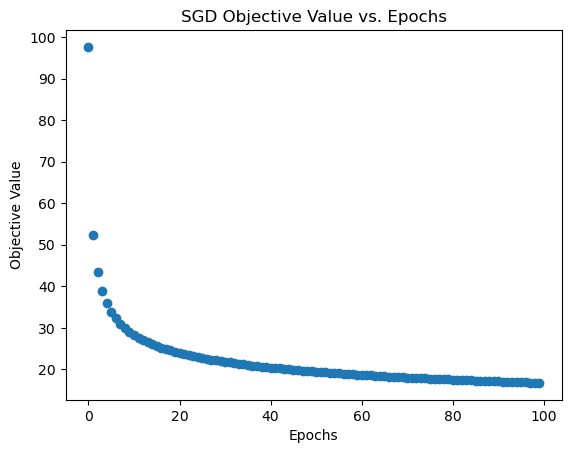

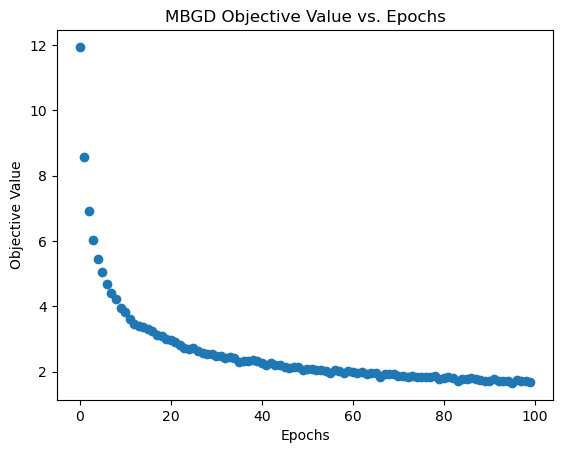

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

epoch = 100

plt.scatter(range(epoch), gd_objvals)
plt.title("GD Objective Value vs. Epochs")
plt.ylabel('Objective Value')
plt.xlabel('Epochs')
plt.show()


plt.scatter(range(epoch), sgd_objvals)
plt.title("SGD Objective Value vs. Epochs")
plt.ylabel('Objective Value')
plt.xlabel('Epochs')
plt.show()


plt.scatter(range(epoch), mbgd_objvals)
plt.title("MBGD Objective Value vs. Epochs")
plt.ylabel('Objective Value')
plt.xlabel('Epochs')
plt.show()

# 5. Prediction
### Compare the training and testing accuracy for logistic regression and regularized logistic regression.

In [21]:
# Predict class label
# Inputs:
#     w: weights: d-by-1 matrix
#     X: data: m-by-d matrix
# Return:
#     f: m-by-1 matrix, the predictions
def predict(w, X):
    return numpy.sign(numpy.dot(X,w))

In [22]:
# evaluate training error of logistic regression and regularized version

#USING MSE (Mean squared error)

p_gd = predict(gd_w, x_train) #predictions
mse = mean_squared_error(p_gd, y_train)
print('GD training error:' ,mse)

p_rgd = predict(rgd_w, x_train) #predictions
mse = mean_squared_error(p_rgd, y_train)
print('Reg GD training error:' ,mse)

p_sgd = predict(sgd_w, x_train) #predictions
mse = mean_squared_error(p_sgd, y_train)
print('SGD training error:' ,mse)

p_rsgd = predict(rsgd_w, x_train) #predictions
mse = mean_squared_error(p_rsgd, y_train)
print('Reg SGD training error:' ,mse)

p_mbgd = predict(mbgd_w, x_train) #predictions
mse = mean_squared_error(p_mbgd, y_train)
print('MBGD training error:' ,mse)

p_rmbgd = predict(rmbgd_w, x_train) #predictions
mse = mean_squared_error(p_rmbgd, y_train)
print('Reg MBGD training error:' ,mse)



GD training error: 0.15824175824175823
Reg GD training error: 0.15824175824175823
SGD training error: 0.035164835164835165
Reg SGD training error: 0.06153846153846154
MBGD training error: 0.0967032967032967
Reg MBGD training error: 0.08791208791208792


In [23]:
# evaluate testing error of logistic regression and regularized version

p_gd = predict(gd_w, x_test)
mse = mean_squared_error(p_gd, y_test)
print('GD testing error:' ,mse)

p_rgd = predict(rgd_w, x_test)
mse = mean_squared_error(p_rgd, y_test)
print('Reg GD testing error:' ,mse)

p_sgd = predict(sgd_w, x_test)
mse = mean_squared_error(p_sgd, y_test)
print('SGD testing error:' ,mse)

p_rsgd = predict(rsgd_w, x_test)
mse = mean_squared_error(p_rsgd, y_test)
print('Reg SGD testing error:' ,mse)

p_mbgd = predict(mbgd_w, x_test)
mse = mean_squared_error(p_mbgd, y_test)
print('MBGD testing error:' ,mse)

p_rmbgd = predict(rmbgd_w, x_test)
mse = mean_squared_error(p_rmbgd, y_test)
print('Reg MBGD testing error:' ,mse)

GD testing error: 0.3157894736842105
Reg GD testing error: 0.3157894736842105
SGD testing error: 0.14035087719298245
Reg SGD testing error: 0.10526315789473684
MBGD testing error: 0.14035087719298245
Reg MBGD testing error: 0.14035087719298245


# 6. Parameters tuning

### In this section, you may try different combinations of parameters (regularization value, learning rate, etc) to see their effects on the model. (Open ended question)